In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 10
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.despine()
sns.set_style("dark")

<Figure size 1008x720 with 0 Axes>

# Importing Datasets

### Raw Punk Attributes --> Datasets with unnested values

In [3]:
punk_attributes = pd.read_csv('raw_punks.csv')

In [4]:
punk_attributes

,Unnamed: 0,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,1,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN
2,2,2,Female,8090,Light,1,Wild Hair,0,NaN
3,3,3,Male,7896,Dark,3,"Nerd Glasses,Pipe,Wild Hair",0,NaN
4,4,4,Male,7332,Mid,4,"Big Shades,Earring,Goat,Wild Hair",0,NaN
...,...,...,...,...,...,...,...,...,...
9995,9995,9995,Female,2466,Albino,2,"Purple Eye Shadow,Straight Hair Dark",0,NaN
9996,9996,9996,Male,4323,Light,4,"Cigarette,Crazy Hair,Earring,Smile",0,NaN
9997,9997,9997,Zombie,498,Zombie,2,"Cap Forward,Front Beard",0,NaN
9998,9998,9998,Female,1271,Mid,3,"Black Lipstick,Clown Eyes Green,Wild White Hair",0,NaN


In [5]:
transactions = pd.read_csv('transactions.csv')

In [6]:
transactions

,Unnamed: 0,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars
0,0,250Ξ ($1.03M),0x983ace,NaN,"May 10, 2021",Bid Withdrawn,0.0,250.0,1030000.0
1,1,"250Ξ ($537,615)",0x983ace,NaN,"Apr 11, 2021",Bid,0.0,250.0,537615.0
2,2,"100Ξ ($160,973)",0xd7510a,NaN,"Mar 03, 2021",Bid Withdrawn,0.0,100.0,160973.0
3,3,"100Ξ ($188,897)",0xd7510a,NaN,"Feb 20, 2021",Bid,0.0,100.0,188897.0
4,4,"69Ξ ($25,532)",natealex,NaN,"Sep 16, 2020",Bid Withdrawn,0.0,69.0,25532.0
...,...,...,...,...,...,...,...,...,...
92818,64588,"8Ξ ($1,588)",NaN,NaN,"May 21, 2020",Offered,9982.0,8.0,1588.0
92819,64593,0.10Ξ ($21),0x6611fe,NaN,"Jul 10, 2017",Bid Withdrawn,9984.0,0.1,21.0
92820,64594,0.10Ξ ($28),0x6611fe,NaN,"Jul 02, 2017",Bid,9984.0,0.1,28.0
92821,64597,0.10Ξ ($9),0x95,NaN,"Dec 11, 2018",Bid Withdrawn,9985.0,0.1,9.0


In [7]:
offers = pd.read_csv('offers.csv')

In [8]:
offers

,Unnamed: 0,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars
0,18,"100Ξ ($18,303)",NaN,NaN,"Sep 12, 2018",Offered,0.0,100.00,18303.0
1,19,"200Ξ ($138,566)",NaN,NaN,"Dec 16, 2017",Offered,0.0,200.00,138566.0
2,22,"400Ξ ($96,376)",NaN,NaN,"Jul 07, 2017",Offered,0.0,400.00,96376.0
3,38,"79.50Ξ ($46,842)",NaN,NaN,"Nov 25, 2020",Offered,1.0,79.50,46842.0
4,41,"119.10Ξ ($65,980)",NaN,NaN,"Nov 22, 2020",Offered,1.0,119.10,65980.0
...,...,...,...,...,...,...,...,...,...
44330,64571,1Ξ ($187),NaN,NaN,"Apr 25, 2020",Offered,9979.0,1.00,187.0
44331,64573,3.14Ξ ($797),NaN,NaN,"Jun 26, 2017",Offered,9979.0,3.14,797.0
44332,64575,"32Ξ ($58,248)",NaN,NaN,"Jul 19, 2021",Offered,9980.0,32.00,58248.0
44333,64586,"99.99Ξ ($152,787)",NaN,NaN,"Mar 05, 2021",Offered,9982.0,99.99,152787.0


In [9]:
bids = pd.read_csv('bids.csv')

In [10]:
bids

,Unnamed: 0,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars
0,0,250Ξ ($1.03M),0x983ace,NaN,"May 10, 2021",Bid Withdrawn,0.0,250.0,1030000.0
1,1,"250Ξ ($537,615)",0x983ace,NaN,"Apr 11, 2021",Bid,0.0,250.0,537615.0
2,2,"100Ξ ($160,973)",0xd7510a,NaN,"Mar 03, 2021",Bid Withdrawn,0.0,100.0,160973.0
3,3,"100Ξ ($188,897)",0xd7510a,NaN,"Feb 20, 2021",Bid,0.0,100.0,188897.0
4,4,"69Ξ ($25,532)",natealex,NaN,"Sep 16, 2020",Bid Withdrawn,0.0,69.0,25532.0
...,...,...,...,...,...,...,...,...,...
34320,64579,0.10Ξ ($64),Kenney,NaN,"Apr 23, 2018",Bid,9980.0,0.1,64.0
34321,64593,0.10Ξ ($21),0x6611fe,NaN,"Jul 10, 2017",Bid Withdrawn,9984.0,0.1,21.0
34322,64594,0.10Ξ ($28),0x6611fe,NaN,"Jul 02, 2017",Bid,9984.0,0.1,28.0
34323,64597,0.10Ξ ($9),0x95,NaN,"Dec 11, 2018",Bid Withdrawn,9985.0,0.1,9.0


### Punk Sales

In [11]:
sales = pd.read_csv('sales.csv')

In [12]:
sales['Txn'] = sales['Txn'].astype('datetime64')

In [13]:
sales

,Unnamed: 0,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars
0,16,"25Ξ ($2,822)",0xf5099e,0xe08c32,2018-11-30,Sold,0.0,25.00,2822.0
1,24,1.60Ξ ($386),0x00d7c9,0xa0a59c,2017-07-07,Sold,0.0,1.60,386.0
2,31,0.98Ξ ($320),0xc352b5,0x00d7c9,2017-06-23,Sold,0.0,0.98,320.0
3,36,"60Ξ ($36,305)",EliteCat…,0xcf6165,2020-11-30,Sold,1.0,60.00,36305.0
4,62,"31Ξ ($5,155)",0xf5099e,GoWest23,2019-04-06,Sold,1.0,31.00,5155.0
...,...,...,...,...,...,...,...,...,...
14158,64562,"6.20Ξ ($7,744)",niwin,0xb166dd,2021-01-27,Sold,9979.0,6.20,7744.0
14159,64565,"5Ξ ($1,824)",pastelcr…,niwin,2020-09-28,Sold,9979.0,5.00,1824.0
14160,64569,1Ξ ($214),shilpixe…,pastelcr…,2020-05-20,Sold,9979.0,1.00,214.0
14161,64576,"29Ξ ($68,110)",Kenney,0xaa614b,2021-07-04,Sold,9980.0,29.00,68110.0


In [14]:
sales.describe()

,Unnamed: 0,punk_id,amount_ethereum,amount_dollars
count,14163.000000,14163.000000,14163.000000,1.416300e+04
mean,32195.916826,5327.532514,14.402932,2.771882e+04
std,17486.306114,2629.490972,56.271692,1.058900e+05
min,0.000000,0.000000,0.000000,0.000000e+00
25%,17440.500000,3131.000000,0.910000,2.020000e+02
50%,32399.000000,5254.000000,5.750000,2.898000e+03
75%,47047.000000,7558.000000,21.000000,4.160300e+04
max,64578.000000,9980.000000,4200.000000,7.580000e+06


### Aggregated DF

In [15]:
aggregated_df = pd.merge(sales, punk_attributes, left_on=['punk_id'], right_on=['id'])

In [16]:
aggregated_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)

In [17]:
### Adding "Transaction" column in order to find transactioned Punk_ids
transactions['transactioned'] = np.where((transactions['Type']=="Sold"), 1, 0)

In [18]:
aggregated_df['Year'] = aggregated_df['Txn'].dt.year
aggregated_df['Month'] = aggregated_df['Txn'].dt.month

In [19]:
aggregated_df

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits,Year,Month
0,"25Ξ ($2,822)",0xf5099e,0xe08c32,2018-11-30,Sold,0.0,25.00,2822.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,2018,11
1,1.60Ξ ($386),0x00d7c9,0xa0a59c,2017-07-07,Sold,0.0,1.60,386.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,2017,7
2,0.98Ξ ($320),0xc352b5,0x00d7c9,2017-06-23,Sold,0.0,0.98,320.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,2017,6
3,"60Ξ ($36,305)",EliteCat…,0xcf6165,2020-11-30,Sold,1.0,60.00,36305.0,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN,2020,11
4,"31Ξ ($5,155)",0xf5099e,GoWest23,2019-04-06,Sold,1.0,31.00,5155.0,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,"6.20Ξ ($7,744)",niwin,0xb166dd,2021-01-27,Sold,9979.0,6.20,7744.0,9979,Male,7564,Light,4,"Cigarette,Earring,Nerd Glasses,Shaved Head",0,NaN,2021,1
14159,"5Ξ ($1,824)",pastelcr…,niwin,2020-09-28,Sold,9979.0,5.00,1824.0,9979,Male,7564,Light,4,"Cigarette,Earring,Nerd Glasses,Shaved Head",0,NaN,2020,9
14160,1Ξ ($214),shilpixe…,pastelcr…,2020-05-20,Sold,9979.0,1.00,214.0,9979,Male,7564,Light,4,"Cigarette,Earring,Nerd Glasses,Shaved Head",0,NaN,2020,5
14161,"29Ξ ($68,110)",Kenney,0xaa614b,2021-07-04,Sold,9980.0,29.00,68110.0,9980,Female,1159,Mid,4,"Black Lipstick,Blonde Short,Cigarette,Classic ...",0,NaN,2021,7


### Sample distribution

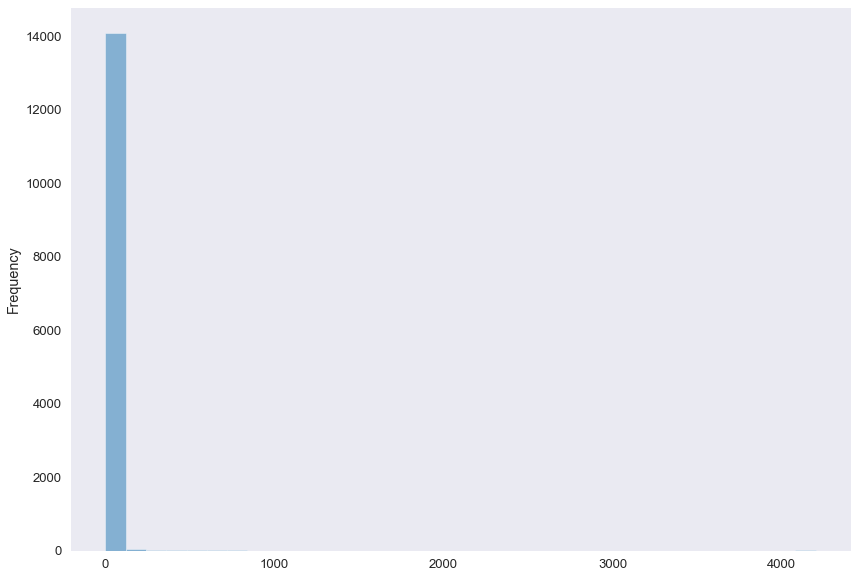

In [20]:
# Histograma

sales['amount_ethereum'].plot(kind='hist', alpha=0.5, bins=35)
#plt.axis([0, 300, 0, 1500000])

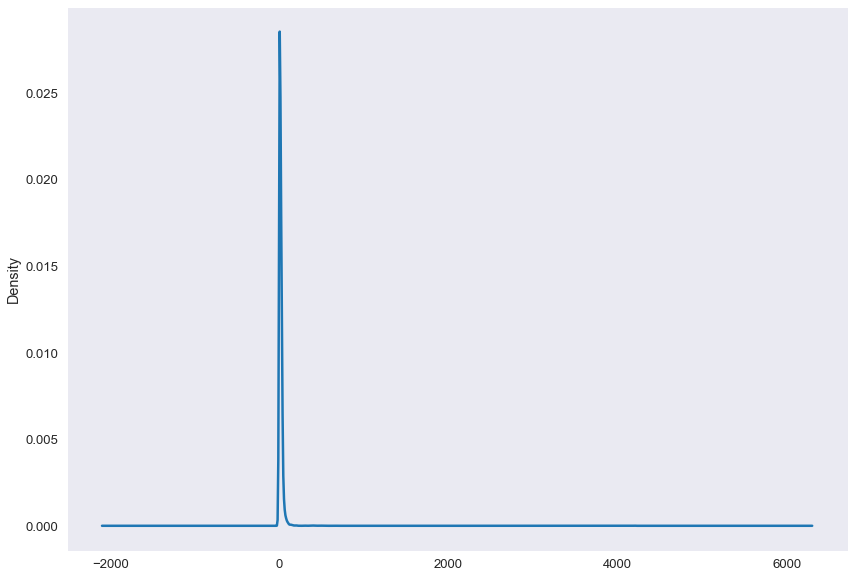

In [21]:
sales['amount_ethereum'].plot.density()
#plt.axis([-300, 300, 0, 0.0175])

# Visualizaciones

### Proportion of punks with registered sales vs universe (10K)

Text(0.5, 1.0, 'Count of transactioned (at least once) vs not transactioned punks')

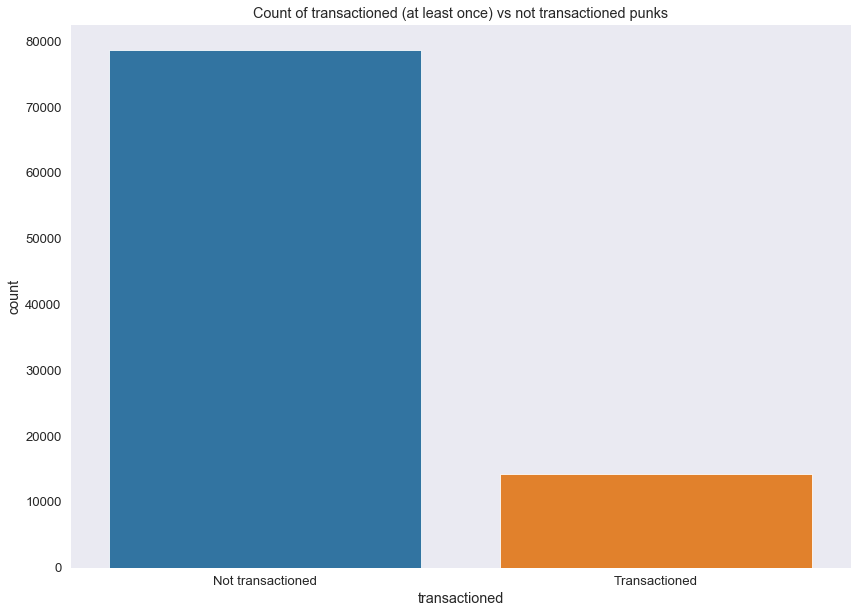

In [22]:
# Punks: Transactioned vs not transactioend

g = sns.countplot(data=punk_attributes.merge(transactions, right_on=['punk_id'], left_on=['id']), x='transactioned')

#g.set_xticks(range(len(s_x)+1))
g.set_xticklabels(['Not transactioned','Transactioned'])
g.set_title('Count of transactioned (at least once) vs not transactioned punks')

### Top 30 punks with highest price

In [24]:
current_price = aggregated_df.groupby('id').max().sort_values(by='amount_dollars', ascending=False)

Text(0.5, 1.0, 'Top 30 punks with highest recorded Sale (E)')

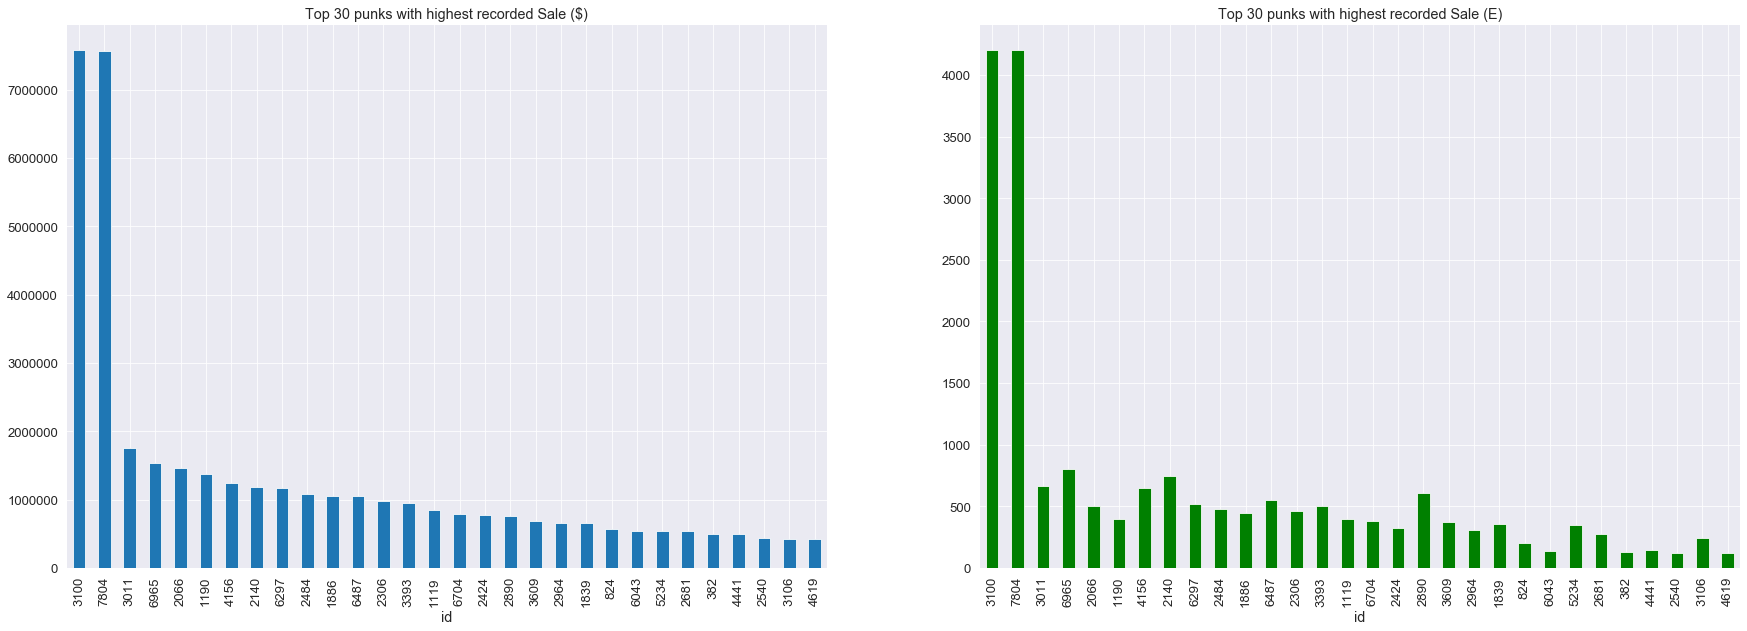

In [25]:
f, ax = plt.subplots(1, 2, figsize=[30, 10])
current_price.amount_dollars.head(30).plot(kind='bar', ax=ax[0], grid=True)
current_price.amount_ethereum.head(30).plot(kind='bar', ax=ax[1], color = 'green', grid=True)

ax[0].set_title('Top 30 punks with highest recorded Sale ($)')
ax[1].set_title('Top 30 punks with highest recorded Sale (E)')

### Cantidad de punks por Cantidad de Compras --> Cambiar tamaño, grid, Axis

In [26]:
current_price['transactioned'] = 1

In [27]:
transactions_by_punk = sales.groupby('punk_id').count()['Txn'].reset_index()

Text(0, 0.5, 'Amount of punks')

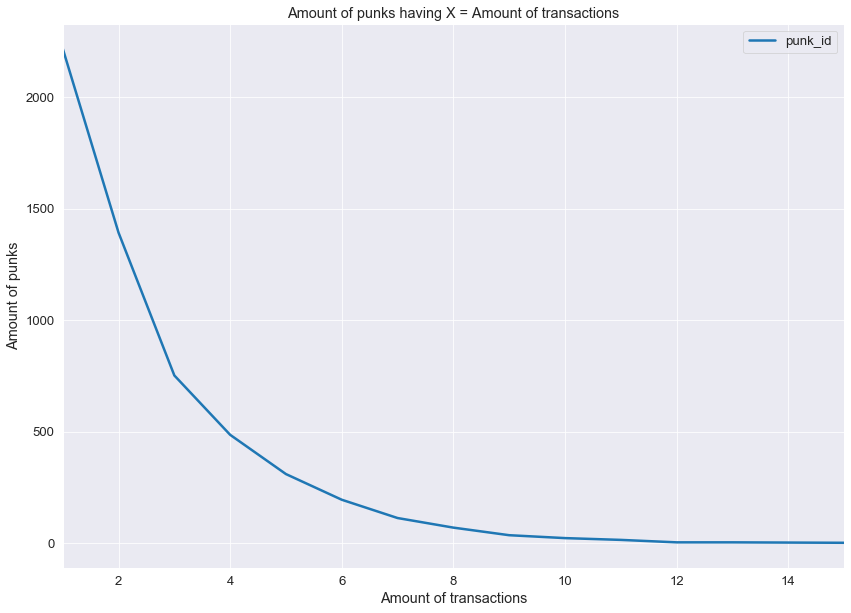

In [28]:
#fig = plt.figure(figsize=(14,8))
g = transactions_by_punk.groupby('Txn').count().plot(grid=True)
#plt.set_xlabel('X Axis')
g.set_title('Amount of punks having X = Amount of transactions')
g.set_xlabel('Amount of transactions')
g.set_ylabel('Amount of punks')

# Visualización por tiempo

### Amount of transactions by Year

In [30]:
sales['year'] = sales['Txn'].dt.year

In [31]:
sales['month'] = sales['Txn'].dt.month

Text(0.5, 1.0, 'Amount of Transactions by year')

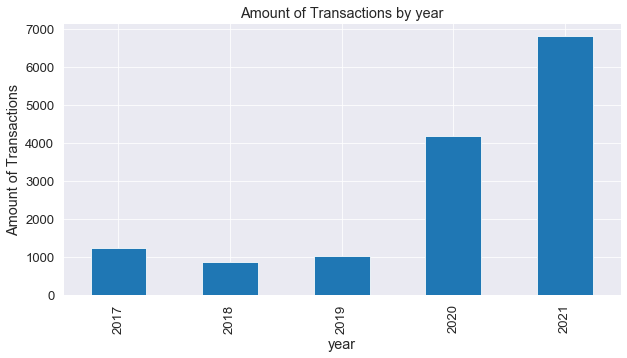

In [32]:
fig = plt.figure(figsize=(10,5))
sales.groupby('year').count()['punk_id'].plot(kind='bar', grid=True)
plt.ylabel('Amount of Transactions')
plt.title('Amount of Transactions by year') 

### Same graph as before

In [33]:
sales_by_year = sales.groupby('year').count()[['punk_id']].reset_index()

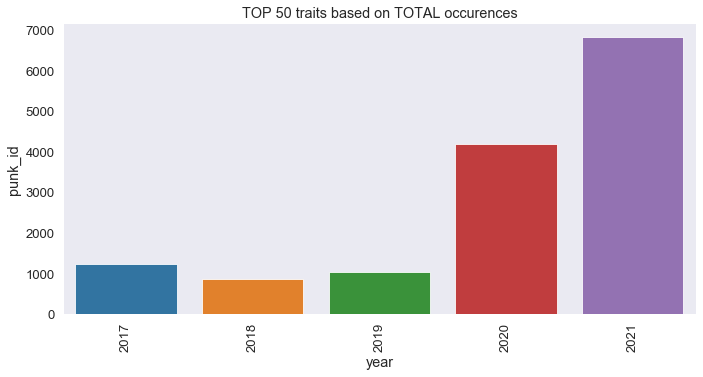

In [34]:
sns.catplot(x='year',y='punk_id', data=sales_by_year, kind='bar',height=5, aspect=10/5)
plt.title('TOP 50 traits based on TOTAL occurences')
plt.xticks(rotation=90)
plt.show()

### Transactions over time --> Do the same with MONTHs and change size?¿

Text(0, 0.5, 'Amount of Transactions')

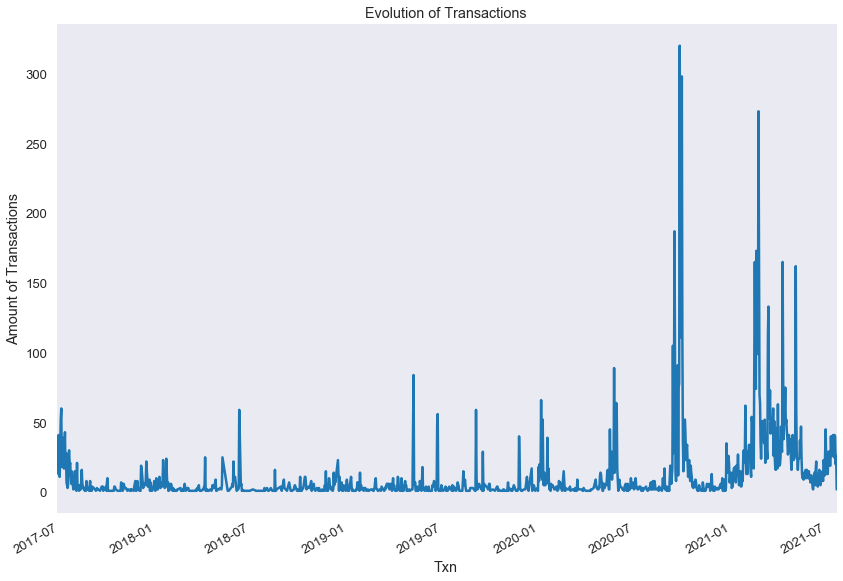

In [35]:
#fig = plt.figure(figsize=(30,14))
sales.groupby('Txn').count()['punk_id'].plot(title='Evolution of Transactions')
plt.ylabel('Amount of Transactions')


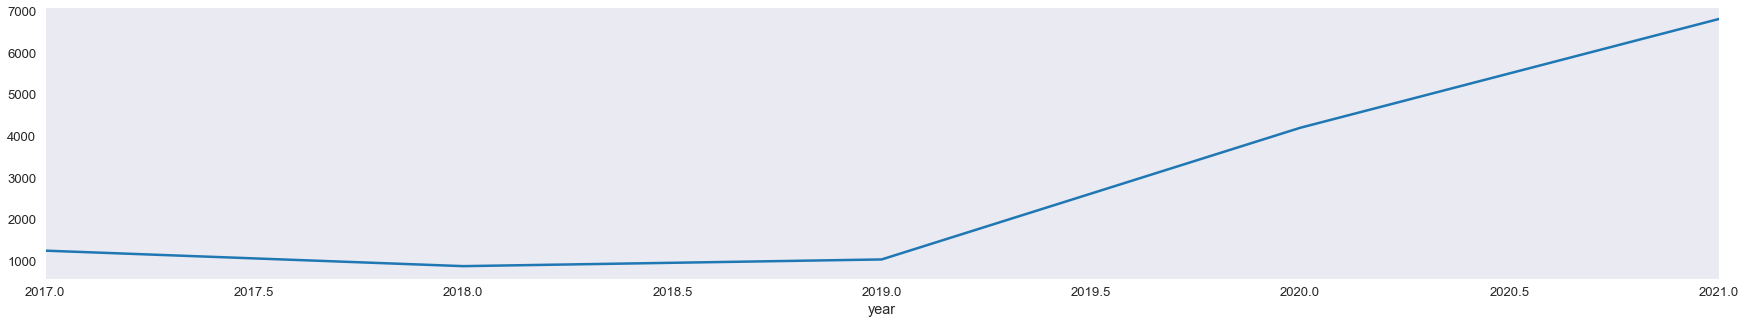

In [36]:
fig = plt.figure(figsize=(30,5))
sales.groupby(['year']).count()['punk_id'].plot()

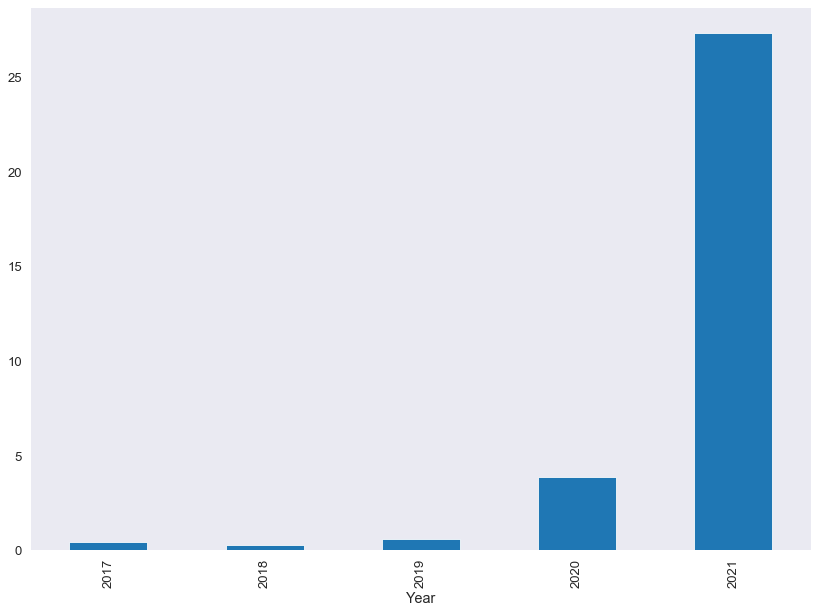

In [37]:
aggregated_df.groupby(['Year']).mean()['amount_ethereum'].plot(kind='bar')

### Evlución del Precio Medio

In [39]:
aggregated_year = aggregated_df.groupby(['Year']).mean().reset_index()
aggregated_year['Growth'] = round(aggregated_year['amount_ethereum'].pct_change(), 2)

##### Aggregated price year table

In [40]:
aggregated_year_table = aggregated_year[['Year', 'amount_ethereum', 'Growth']]
aggregated_year_table['Growth'] = round(aggregated_year_table['Growth']*100, 2)
aggregated_year_table['Growth'] = aggregated_year_table['Growth'].astype('str')+str('%')

C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:

aggregated_year_table.rename(columns={'amount_ethereum':'ETH'})

,Year,ETH,Growth
0,2017,0.415907,nan%
1,2018,0.281936,-32.0%
2,2019,0.597157,112.0%
3,2020,3.877213,549.0%
4,2021,27.353255,605.0%


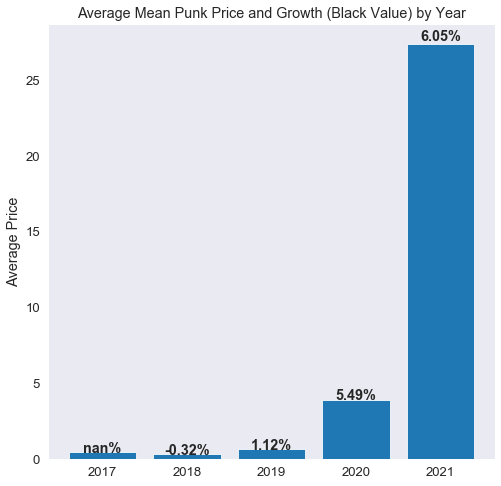

In [42]:



plt.figure(figsize=(8, 8))
colors_list = ['2017','2018', '2019', '2020', '2021']
graph = plt.bar(aggregated_year.Year, aggregated_year.amount_ethereum)
plt.title('Average Mean Punk Price and Growth (Black Value) by Year')
plt.ylabel('Average Price')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(aggregated_year.Growth[i])+'%',
             ha='center',
             weight='bold')
    i += 1
plt.show()

### Precio promedio evolucion

Text(0, 0.5, 'Punk Price in Ξ')

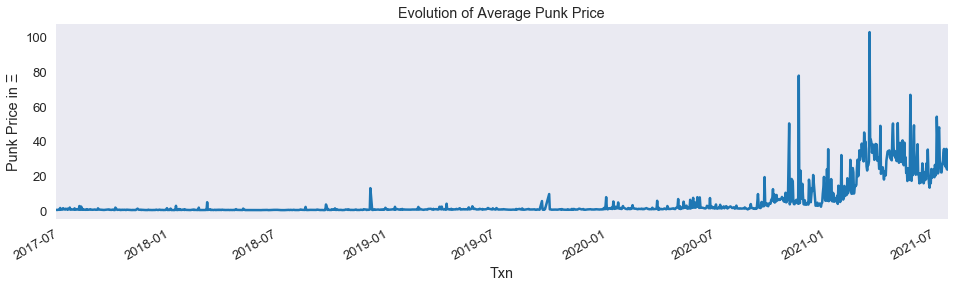

In [43]:
#fig = plt.figure(figsize=(30,14))
sales.groupby('Txn').mean()['amount_ethereum'].plot(title='Evolution of Average Punk Price', figsize=(16,4))
plt.ylabel('Punk Price in Ξ')


### Cantidad de transacciones por Punk Type

Text(0, 0.5, 'Amount of Transactions')

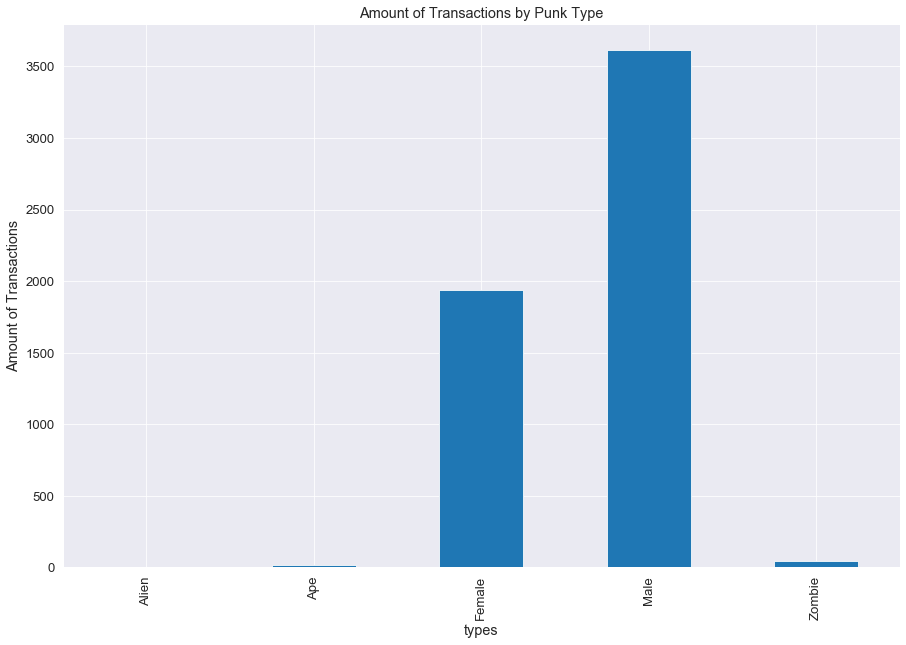

In [44]:
fig = plt.figure(figsize=(15,10))

current_price.groupby('types').count()['amount_ethereum'].plot(kind='bar', grid=True, title='Amount of Transactions by Punk Type')
plt.ylabel('Amount of Transactions')

In [45]:
current_price.groupby('types').count()['amount_ethereum']

types
Alien        6
Ape         16
Female    1940
Male      3617
Zombie      43
Name: amount_ethereum, dtype: int64

In [46]:
aggregated_df

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits,Year,Month
0,"25Ξ ($2,822)",0xf5099e,0xe08c32,2018-11-30,Sold,0.0,25.00,2822.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,2018,11
1,1.60Ξ ($386),0x00d7c9,0xa0a59c,2017-07-07,Sold,0.0,1.60,386.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,2017,7
2,0.98Ξ ($320),0xc352b5,0x00d7c9,2017-06-23,Sold,0.0,0.98,320.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring,2017,6
3,"60Ξ ($36,305)",EliteCat…,0xcf6165,2020-11-30,Sold,1.0,60.00,36305.0,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN,2020,11
4,"31Ξ ($5,155)",0xf5099e,GoWest23,2019-04-06,Sold,1.0,31.00,5155.0,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,"6.20Ξ ($7,744)",niwin,0xb166dd,2021-01-27,Sold,9979.0,6.20,7744.0,9979,Male,7564,Light,4,"Cigarette,Earring,Nerd Glasses,Shaved Head",0,NaN,2021,1
14159,"5Ξ ($1,824)",pastelcr…,niwin,2020-09-28,Sold,9979.0,5.00,1824.0,9979,Male,7564,Light,4,"Cigarette,Earring,Nerd Glasses,Shaved Head",0,NaN,2020,9
14160,1Ξ ($214),shilpixe…,pastelcr…,2020-05-20,Sold,9979.0,1.00,214.0,9979,Male,7564,Light,4,"Cigarette,Earring,Nerd Glasses,Shaved Head",0,NaN,2020,5
14161,"29Ξ ($68,110)",Kenney,0xaa614b,2021-07-04,Sold,9980.0,29.00,68110.0,9980,Female,1159,Mid,4,"Black Lipstick,Blonde Short,Cigarette,Classic ...",0,NaN,2021,7


### Media de precio por año

### Media de precio por año por Punk Type

In [47]:
current_type_price = current_price.groupby('types').mean()[['amount_ethereum', 'amount_dollars']].reset_index()

Text(0.5, 1.0, 'Average Price by Type (E)')

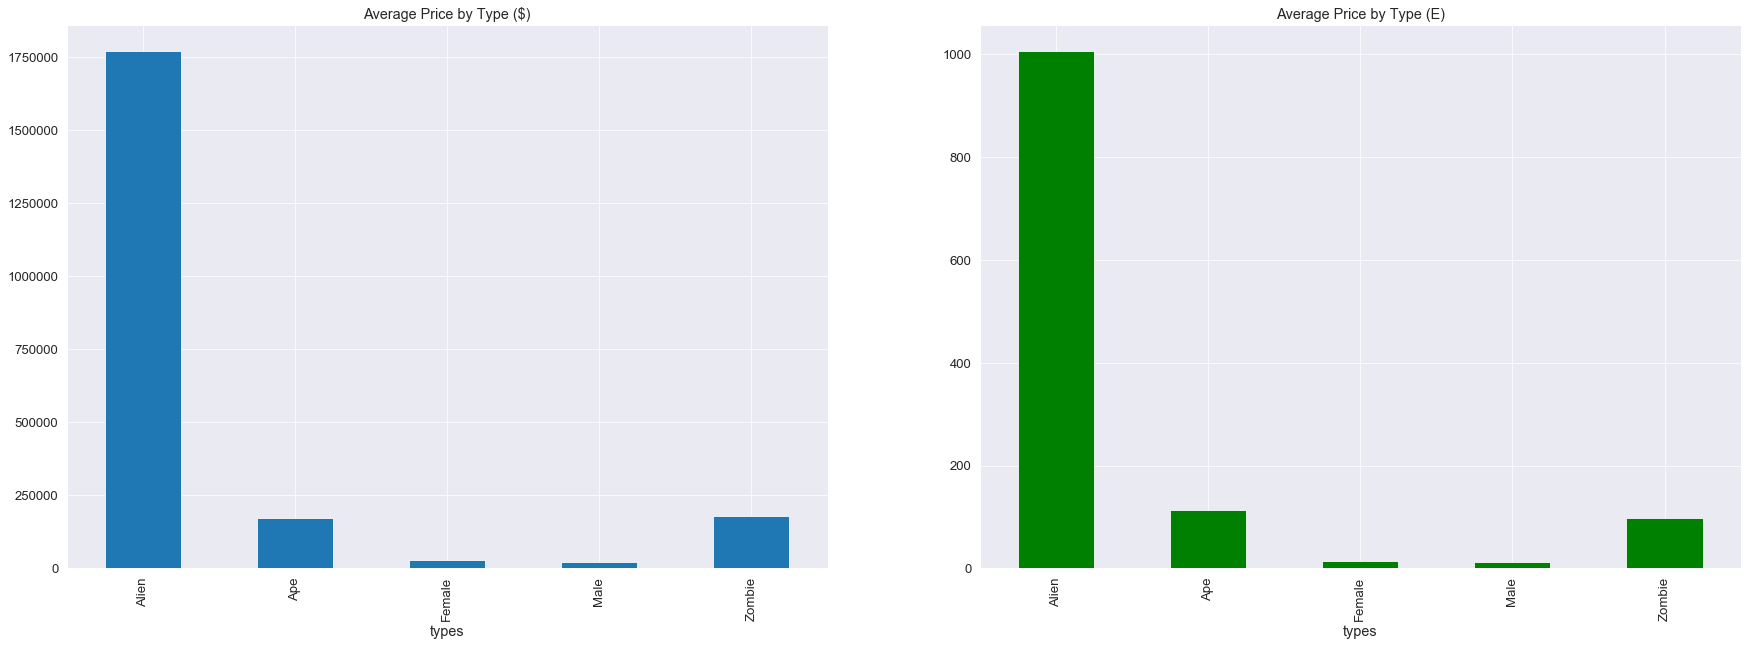

In [48]:
f, ax = plt.subplots(1, 2, figsize=[30, 10])
aggregated_df.groupby('types').mean()['amount_dollars'].plot(kind='bar', ax=ax[0], grid=True)
aggregated_df.groupby('types').mean()['amount_ethereum'].plot(kind='bar', ax=ax[1], color = 'green', grid=True)

ax[0].set_title('Average Price by Type ($)')
ax[1].set_title('Average Price by Type (E)')

### Media por Skin Type

### Maximo y Minimo por Punk Type --> Describe!

### Boxplot Precios

Text(0.5, 1.0, 'Boxplot Prices by Punk Type')

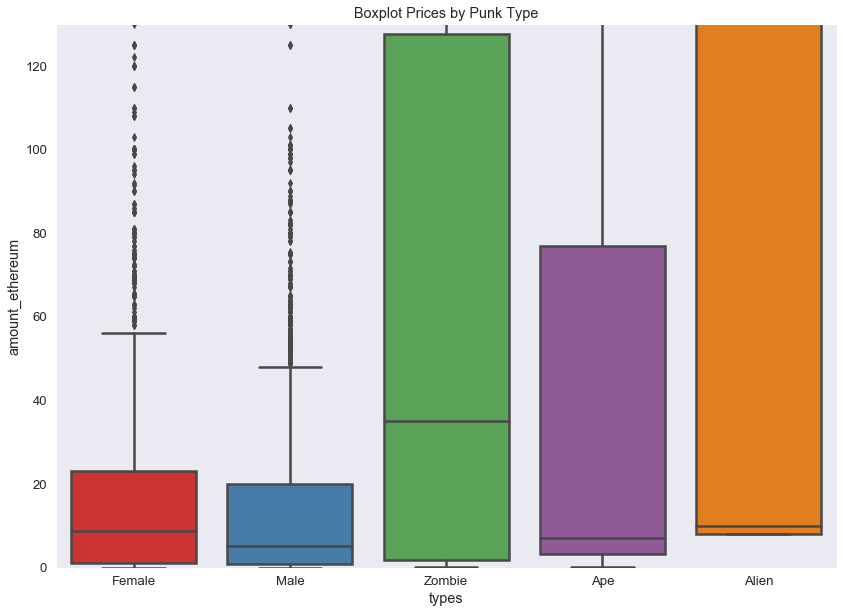

In [53]:
g = sns.boxplot(x='types', y='amount_ethereum', data=aggregated_df, palette='Set1')
g.set_ylim(0, 130)
g.set_title('Boxplot Prices by Punk Type')

### Current price analysis (need to remove other prices different than current date)

In [54]:
current_price_df = aggregated_df.groupby('punk_id').apply(lambda aggregated_df: aggregated_df.loc[aggregated_df.total_traits.idxmax()]).sort_values(by='total_traits', ascending=False)
current_price_df

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits,Year,Month
punk_id,,,,,,,,,,,,,,,,,,
8348.0,"85Ξ ($18,102)",EliteCat…,DANNY,2020-05-20,Sold,8348.0,85.00,18102.0,8348,Male,1,Mid,7,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",0,NaN,2020,5
2202.0,"15Ξ ($3,047)",0xc46280…,DANNY,2020-05-22,Sold,2202.0,15.00,3047.0,2202,Female,19,Dark,6,"Choker,Classic Shades,Earring,Hot Lipstick,Mol...",1,Earring,2020,5
755.0,1.40Ξ ($415),0xc352b5,sov,2017-08-13,Sold,755.0,1.40,415.0,755,Female,24,Albino,6,"Black Lipstick,Blonde Bob,Cigarette,Clown Eyes...",1,Earring,2017,8
3011.0,667Ξ ($1.76M),0xc05488,peted.et…,2021-04-27,Sold,3011.0,667.00,1760000.0,3011,Male,23,Dark,6,"Earring,Frown,Normal Beard,Pipe,Small Shades,V...",1,Frown,2021,4
1839.0,"360Ξ ($653,814)",Pranksy,0xc05488,2021-03-12,Sold,1839.0,360.00,653814.0,1839,Male,28,Dark,6,"Cigarette,Earring,Knitted Cap,Mustache,Nerd Gl...",0,NaN,2021,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,1.10Ξ ($304),0xc352b5,0x6611fe,2017-07-03,Sold,281.0,1.10,304.0,281,Male,7,Light,0,NaN,0,NaN,2017,7
641.0,0.55Ξ ($157),0xc352b5,sov,2017-06-27,Sold,641.0,0.55,157.0,641,Female,6,Light,0,NaN,0,NaN,2017,6
1050.0,0.34Ξ ($102),0xd4fa6e,sov,2017-06-24,Sold,1050.0,0.34,102.0,1050,Female,8,Mid,0,NaN,0,NaN,2017,6


# HASTA ACA LLEGUE! EL RESTO ES RELLENO

In [55]:
# Price percentile boxes (name?) --> Ojo el hue! 
# Tabla tiene que tener un único valor posible de fecha para cada precio. 

In [56]:
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)

NameError: name 'room_prices' is not defined

##### Current price evolution

In [ ]:
Need to create DF with mean price

In [ ]:
Graf with evolution over time

In [ ]:
Eje X con meses y hue/col con año (de manera que sean 3 series temporales mostradas - 3 lineas)
Eje Y precio. 

In [ ]:
aggregated_df.groupby('Txn')['amount_ethereum'].mean().plot()

### Historical price analysis --> Evolution: mean/median price for first purchase vs 2nd, 3rd, etc

### Dia de la semana con mayor cantidad de Compras

### Evolución cantidad de compras

# WORK WITH RANGES?

In [ ]:
Count of Punks sales, bids and offers (3 bars and or cumulative)

In [ ]:
#fig = plt.figure(figsize=(30,14))
transactions.groupby('Txn').count()['punk_id'].plot(title='Evolution of Transactions', hue='Type')

In [ ]:
Compare bars btw types. Proportion transactions vs proportion Quantity of punks

In [ ]:
### Days from offer to sale?

### Correlaciòn entre tipos? --> Agrupamos

In [ ]:
sns.heatmap(correlacion_generos)